# Fraud Transactions prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\dell\\Downloads\\Fraud.csv")

In [3]:
df.head()#to see Top 5 rows from the given data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.tail()#Last 5 rows from the given data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


# Column Descriptions

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [5]:
df.shape #number of rows and columns 

(6362620, 11)

In [6]:
df.describe()#for mean,median,mode 

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df['step'].max()

743

The step variable starts from 1 hour to 743 hour (30 days).

median for the newbalance_orig is 0.

In [8]:
categorical_attributes = df.select_dtypes(include='object')#To include object dtype columns

In [9]:
categorical_attributes.describe()

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


The majority type is CASH_OUT with 2237500.

In [10]:
df.info()#to check the Dtype of that column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
df.isnull().sum()#no missing values present in this dataset

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

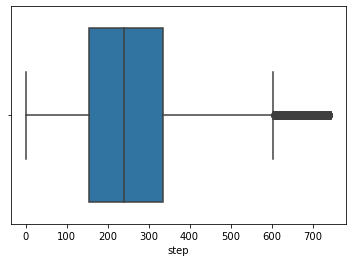

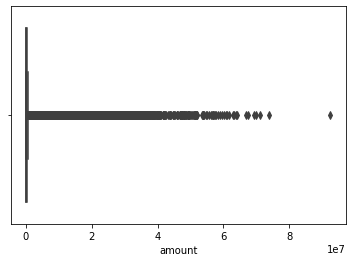

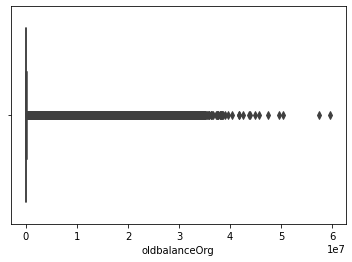

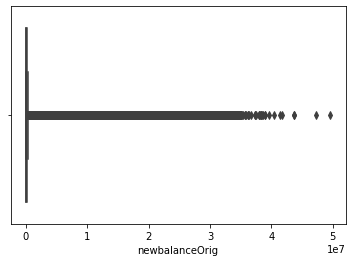

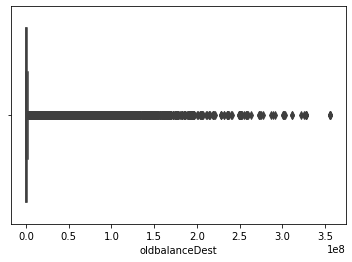

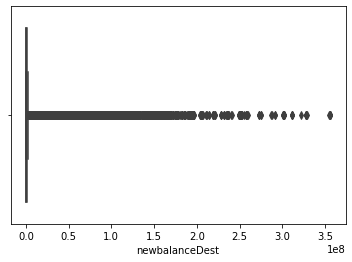

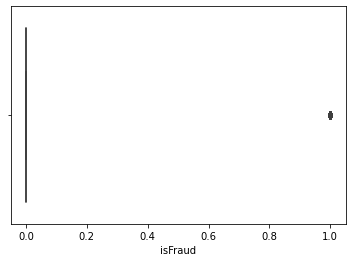

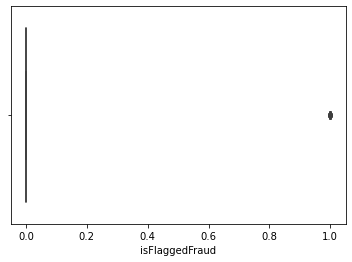

In [12]:
n=df.select_dtypes(exclude='object')
for i in n.columns:
    sns.boxplot(data=n,x=i)
    plt.show()

In [13]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [14]:
df['type'].unique()#5 types of payments present.

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [15]:
df['type'].value_counts()#no.of times that payment occured.

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

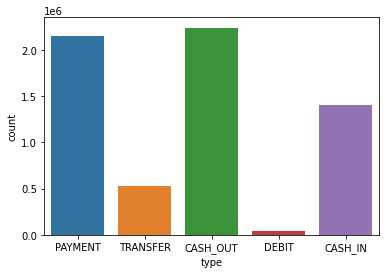

In [16]:
sns.countplot(df['type'])
plt.show()

In [17]:
df['isFraud'].value_counts()#8213 transactions made by the fraudulent agents.

0    6354407
1       8213
Name: isFraud, dtype: int64

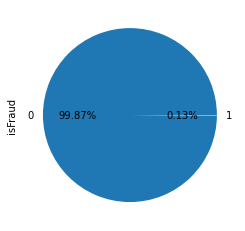

In [18]:
df['isFraud'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

In [19]:
df['isFlaggedFraud'].value_counts()# 16 illegal attempts to transfer more than 2,00,000 in a single transaction.

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

<AxesSubplot:ylabel='isFlaggedFraud'>

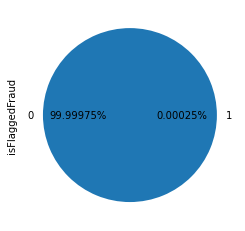

In [20]:
df['isFlaggedFraud'].value_counts().plot(kind='pie',autopct='%0.5f%%')

In [21]:
payment=df[(df.type == 'TRANSFER') & (df.isFraud==1)]
payment

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,0


In [22]:
payment=df[(df.type == 'CASH_OUT') & (df.isFraud==1)]
payment

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


In [23]:
payment=df[(df.type == 'TRANSFER') & (df.isFlaggedFraud==1)]
print(len(payment))
payment

16


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [24]:
fraud=df[df.isFraud==1]
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [25]:
fraud=df[df.isFlaggedFraud==1]
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [26]:
df['step_days'] = df['step'].apply(lambda i: i/24)
df['step_weeks'] = df['step'].apply(lambda i: i/(24*7))

# difference between initial balance before the transaction and new balance after the transaction
df['diff_new_old_balance'] =  df['oldbalanceOrg'] -df['newbalanceOrig']

# difference between initial balance recipient before the transaction and new balance recipient after the transaction.
df['diff_new_old_destiny'] =  df['oldbalanceDest']- df['newbalanceDest'] 

# name orig and name dest
df['nameOrig'] = df['nameOrig'].apply(lambda i: i[0])
df['nameDest'] = df['nameDest'].apply(lambda i: i[0])

In [27]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,step_days,step_weeks,diff_new_old_balance,diff_new_old_destiny
0,1,PAYMENT,9839.64,C,170136.0,160296.36,M,0.0,0.0,0,0,0.041667,0.005952,9839.64,0.0
1,1,PAYMENT,1864.28,C,21249.0,19384.72,M,0.0,0.0,0,0,0.041667,0.005952,1864.28,0.0
2,1,TRANSFER,181.00,C,181.0,0.00,C,0.0,0.0,1,0,0.041667,0.005952,181.00,0.0
3,1,CASH_OUT,181.00,C,181.0,0.00,C,21182.0,0.0,1,0,0.041667,0.005952,181.00,21182.0
4,1,PAYMENT,11668.14,C,41554.0,29885.86,M,0.0,0.0,0,0,0.041667,0.005952,11668.14,0.0


In [28]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,step_days,step_weeks,diff_new_old_balance,diff_new_old_destiny
6362615,743,CASH_OUT,339682.13,C,339682.13,0.0,C,0.00,339682.13,1,0,30.958333,4.422619,339682.13,-339682.13
6362616,743,TRANSFER,6311409.28,C,6311409.28,0.0,C,0.00,0.00,1,0,30.958333,4.422619,6311409.28,0.00
6362617,743,CASH_OUT,6311409.28,C,6311409.28,0.0,C,68488.84,6379898.11,1,0,30.958333,4.422619,6311409.28,-6311409.27
6362618,743,TRANSFER,850002.52,C,850002.52,0.0,C,0.00,0.00,1,0,30.958333,4.422619,850002.52,0.00
6362619,743,CASH_OUT,850002.52,C,850002.52,0.0,C,6510099.11,7360101.63,1,0,30.958333,4.422619,850002.52,-850002.52


In [29]:
df['step_days'].value_counts()

0.791667     51352
0.750000     49579
7.791667     49083
9.791667     47491
12.791667    46968
             ...  
18.000000        4
29.416667        4
28.875000        4
4.666667         2
27.583333        2
Name: step_days, Length: 743, dtype: int64

In [30]:
print('\n The types of fraudulent transaction are {}'.format(list(df.loc[df.isFraud == 1].type.drop_duplicates().values)))

FraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
FraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]
FraudPayment=df.loc[(df.isFraud==1) & (df.type=='PAYMENT')]

print('\n The number of fraudulent TRANSFERs = {}'.format(len(FraudTransfer)))
print('\n The number of fraudulent CASH_OUTs = {}'.format(len(FraudCashout)))
print('\n The number of fraudulent PAYMENT = {}'.format(len(FraudPayment)))


 The types of fraudulent transaction are ['TRANSFER', 'CASH_OUT']

 The number of fraudulent TRANSFERs = 4097

 The number of fraudulent CASH_OUTs = 4116

 The number of fraudulent PAYMENT = 0


In [31]:
setpdays=df.loc[df.isFraud == 1].step_days.drop_duplicates().values
print(setpdays.min())
print(setpdays.max())

0.041666666666666664
30.958333333333332


In [32]:
setpdays=df.loc[df.isFlaggedFraud == 1].step_days.drop_duplicates().values
print(setpdays.min())
print(setpdays.max())

8.833333333333334
30.875


In [33]:
CountisFlaggedFraud = df.loc[(df.isFlaggedFraud == 1)]

CountisFlaggedFraudWithTransfer = df.loc[(df.isFlaggedFraud == 1) & (df.type == 'TRANSFER')]

print(len(CountisFlaggedFraud))
print(len(CountisFlaggedFraudWithTransfer))
print(df.shape)
print(CountisFlaggedFraudWithTransfer)

print('\nThe type of transactions in which isFlaggedFraud is set: \
{}'.format(list(df.loc[df.isFlaggedFraud == 1].type.drop_duplicates())))


dfTransfer = df.loc[df.type == 'TRANSFER']
dfFlagged = df.loc[df.isFlaggedFraud == 1]
dfNotFlagged = df.loc[df.isFlaggedFraud == 0]

print('\n The minimum amount transacted when isFlaggedFraud is set ={}'.format(dfFlagged.amount.min()))

print('\n The max amount transacted when isFlaggedFraud is set ={}'.format(dfFlagged.amount.max()))

print('\nThe max amount is TRANSFERED when isFlaggedFraud is NOT set ={}'.format(dfNotFlagged.amount.max()))

16
16
(6362620, 15)
         step      type       amount nameOrig  oldbalanceOrg  newbalanceOrig  \
2736446   212  TRANSFER   4953893.08        C     4953893.08      4953893.08   
3247297   250  TRANSFER   1343002.08        C     1343002.08      1343002.08   
3760288   279  TRANSFER    536624.41        C      536624.41       536624.41   
5563713   387  TRANSFER   4892193.09        C     4892193.09      4892193.09   
5996407   425  TRANSFER  10000000.00        C    19585040.37     19585040.37   
5996409   425  TRANSFER   9585040.37        C    19585040.37     19585040.37   
6168499   554  TRANSFER   3576297.10        C     3576297.10      3576297.10   
6205439   586  TRANSFER    353874.22        C      353874.22       353874.22   
6266413   617  TRANSFER   2542664.27        C     2542664.27      2542664.27   
6281482   646  TRANSFER  10000000.00        C    10399045.08     10399045.08   
6281484   646  TRANSFER    399045.08        C    10399045.08     10399045.08   
6296014   671  TRANS

Fraud transactions occours with in 1 hour with the amount which is less then 200000.


Fraud transactions occours with in 8 days with the amount which is more then 200000.

On average of Fraud transactions occours which is equal to 100000 with in 15 days.

In [34]:
FlaggedFound = df.loc[(df.isFraud == 1)]
print(FlaggedFound.describe())
print('\n')
print(FlaggedFound.median())
print('\n')
print(FlaggedFound.max())
print('\n')

              step        amount  oldbalanceOrg  newbalanceOrig  \
count  8213.000000  8.213000e+03   8.213000e+03    8.213000e+03   
mean    368.413856  1.467967e+06   1.649668e+06    1.923926e+05   
std     216.388690  2.404253e+06   3.547719e+06    1.965666e+06   
min       1.000000  0.000000e+00   0.000000e+00    0.000000e+00   
25%     181.000000  1.270913e+05   1.258224e+05    0.000000e+00   
50%     367.000000  4.414234e+05   4.389835e+05    0.000000e+00   
75%     558.000000  1.517771e+06   1.517771e+06    0.000000e+00   
max     743.000000  1.000000e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud    step_days  \
count    8.213000e+03    8.213000e+03   8213.0     8213.000000  8213.000000   
mean     5.442496e+05    1.279708e+06      1.0        0.001948    15.350577   
std      3.336421e+06    3.908817e+06      0.0        0.044097     9.016195   
min      0.000000e+00    0.000000e+00      1.0        0.000000     0.041667   
2

# Univariate Analysis

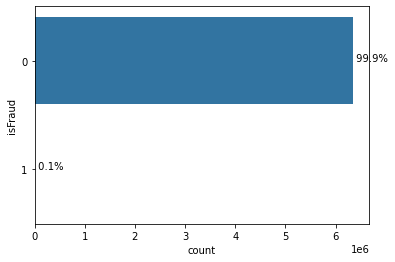

In [35]:
ax = sns.countplot(y='isFraud', data=df);

total = df['isFraud'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [36]:
df.dtypes

step                      int64
type                     object
amount                  float64
nameOrig                 object
oldbalanceOrg           float64
newbalanceOrig          float64
nameDest                 object
oldbalanceDest          float64
newbalanceDest          float64
isFraud                   int64
isFlaggedFraud            int64
step_days               float64
step_weeks              float64
diff_new_old_balance    float64
diff_new_old_destiny    float64
dtype: object

# Model Implementation

In [37]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()

In [38]:
df['type']=lr.fit_transform(df['type'])
df['nameOrig']=lr.fit_transform(df['nameOrig'])
df['nameDest'] =lr.fit_transform(df['nameDest'])

In [39]:
df.dtypes

step                      int64
type                      int32
amount                  float64
nameOrig                  int32
oldbalanceOrg           float64
newbalanceOrig          float64
nameDest                  int32
oldbalanceDest          float64
newbalanceDest          float64
isFraud                   int64
isFlaggedFraud            int64
step_days               float64
step_weeks              float64
diff_new_old_balance    float64
diff_new_old_destiny    float64
dtype: object

In [40]:
FlaggedFound = df.loc[(df.isFraud == 1)]
print(FlaggedFound.describe())
print('\n')
print(FlaggedFound.median())
print('\n')
print(FlaggedFound.max())
print('\n')

              step         type        amount  nameOrig  oldbalanceOrg  \
count  8213.000000  8213.000000  8.213000e+03    8213.0   8.213000e+03   
mean    368.413856     2.496530  1.467967e+06       0.0   1.649668e+06   
std     216.388690     1.500087  2.404253e+06       0.0   3.547719e+06   
min       1.000000     1.000000  0.000000e+00       0.0   0.000000e+00   
25%     181.000000     1.000000  1.270913e+05       0.0   1.258224e+05   
50%     367.000000     1.000000  4.414234e+05       0.0   4.389835e+05   
75%     558.000000     4.000000  1.517771e+06       0.0   1.517771e+06   
max     743.000000     4.000000  1.000000e+07       0.0   5.958504e+07   

       newbalanceOrig  nameDest  oldbalanceDest  newbalanceDest  isFraud  \
count    8.213000e+03    8213.0    8.213000e+03    8.213000e+03   8213.0   
mean     1.923926e+05       0.0    5.442496e+05    1.279708e+06      1.0   
std      1.965666e+06       0.0    3.336421e+06    3.908817e+06      0.0   
min      0.000000e+00       0

In [41]:
fraud=df.values
fraud

array([[ 1.00000000e+00,  3.00000000e+00,  9.83964000e+03, ...,
         5.95238095e-03,  9.83964000e+03,  0.00000000e+00],
       [ 1.00000000e+00,  3.00000000e+00,  1.86428000e+03, ...,
         5.95238095e-03,  1.86428000e+03,  0.00000000e+00],
       [ 1.00000000e+00,  4.00000000e+00,  1.81000000e+02, ...,
         5.95238095e-03,  1.81000000e+02,  0.00000000e+00],
       ...,
       [ 7.43000000e+02,  1.00000000e+00,  6.31140928e+06, ...,
         4.42261905e+00,  6.31140928e+06, -6.31140927e+06],
       [ 7.43000000e+02,  4.00000000e+00,  8.50002520e+05, ...,
         4.42261905e+00,  8.50002520e+05,  0.00000000e+00],
       [ 7.43000000e+02,  1.00000000e+00,  8.50002520e+05, ...,
         4.42261905e+00,  8.50002520e+05, -8.50002520e+05]])

In [42]:
X =fraud[:,0:10] #Predictors
y = fraud[:,10] #Target
print(X)
print(y)

[[1.00000000e+00 3.00000000e+00 9.83964000e+03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 3.00000000e+00 1.86428000e+03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 4.00000000e+00 1.81000000e+02 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [7.43000000e+02 1.00000000e+00 6.31140928e+06 ... 6.84888400e+04
  6.37989811e+06 1.00000000e+00]
 [7.43000000e+02 4.00000000e+00 8.50002520e+05 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [7.43000000e+02 1.00000000e+00 8.50002520e+05 ... 6.51009911e+06
  7.36010163e+06 1.00000000e+00]]
[0. 0. 0. ... 0. 0. 0.]


In [43]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,step_days,step_weeks,diff_new_old_balance,diff_new_old_destiny
0,1,3,9839.64,0,170136.0,160296.36,1,0.0,0.0,0,0,0.041667,0.005952,9839.64,0.0
1,1,3,1864.28,0,21249.0,19384.72,1,0.0,0.0,0,0,0.041667,0.005952,1864.28,0.0
2,1,4,181.00,0,181.0,0.00,0,0.0,0.0,1,0,0.041667,0.005952,181.00,0.0
3,1,1,181.00,0,181.0,0.00,0,21182.0,0.0,1,0,0.041667,0.005952,181.00,21182.0
4,1,3,11668.14,0,41554.0,29885.86,1,0.0,0.0,0,0,0.041667,0.005952,11668.14,0.0


In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [46]:
logistic_model = LogisticRegression().fit(X_train,y_train)
ypredicted = logistic_model.predict(X_test)

In [47]:
ypredicted

array([0., 0., 0., ..., 0., 0., 0.])

In [48]:
print(confusion_matrix(y_test,ypredicted))

[[1908779       1]
 [      6       0]]


In [49]:
print(classification_report(y_test,ypredicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1908780
         1.0       0.00      0.00      0.00         6

    accuracy                           1.00   1908786
   macro avg       0.50      0.50      0.50   1908786
weighted avg       1.00      1.00      1.00   1908786



In [50]:
print('Accuracy score :',accuracy_score(y_test,ypredicted))

Accuracy score : 0.9999963327476208


# KNN Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn=KNeighborsClassifier()

In [53]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [54]:
pred=knn.predict(X_test)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [55]:
print(confusion_matrix(y_test,pred))

[[1908780       0]
 [      2       4]]


In [56]:
print(accuracy_score(y_test,pred))

0.9999989522136059


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1908780
         1.0       1.00      0.67      0.80         6

    accuracy                           1.00   1908786
   macro avg       1.00      0.83      0.90   1908786
weighted avg       1.00      1.00      1.00   1908786



# RandomForest

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [60]:
classifier=RandomForestClassifier()

In [61]:
classifier.fit(X_test,y_test)

RandomForestClassifier()

In [62]:
y_pred=classifier.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [63]:
print(confusion_matrix(y_test,y_pred))

[[1908780       0]
 [      0       6]]


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1908780
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786



In [65]:
print(accuracy_score(y_test,pred))

0.9999989522136059
